In [47]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers


In [48]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNEL=3
EPOCHS=50

In [49]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"Dataset",
shuffle=True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size=BATCH_SIZE)


Found 17509 files belonging to 9 classes.


In [50]:
class_names=dataset.class_names
class_names

['Chinee apple',
 'Lantana',
 'Negative',
 'Parkinsonia',
 'Parthenium',
 'Prickly acacia',
 'Rubber vine',
 'Siam weed',
 'Snake weed']

In [51]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds
    

In [52]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [53]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [54]:
len(train_ds)

438

In [55]:
len(test_ds)

56

In [56]:
len(val_ds)

54

In [57]:
resizing_and_rescaleing = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [58]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomContrast(0.4),
    
])

In [62]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNEL)
n_classes=9
model = models.Sequential([
    resizing_and_rescaleing,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    
    
    
    
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
    ])
model.build( input_shape=input_shape)

In [63]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                 

In [66]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
    
)

In [67]:
history = model.fit(
     train_ds,
     epochs=EPOCHS,
     batch_size=BATCH_SIZE,
     verbose=1,
     validation_data=val_ds
)

Epoch 1/50
438/438 [==============================] - 635s 1s/step - loss: 10.4085 - accuracy: 0.5176 - val_loss: 1.8932 - val_accuracy: 0.5185
Epoch 2/50
438/438 [==============================] - 470s 1s/step - loss: 1.7752 - accuracy: 0.5213 - val_loss: 1.9652 - val_accuracy: 0.5185
Epoch 3/50
438/438 [==============================] - 448s 1s/step - loss: 1.6922 - accuracy: 0.5250 - val_loss: 1.8149 - val_accuracy: 0.5145
Epoch 4/50
438/438 [==============================] - 444s 1s/step - loss: 1.5977 - accuracy: 0.5348 - val_loss: 1.8182 - val_accuracy: 0.5324
Epoch 5/50
438/438 [==============================] - 496s 1s/step - loss: 1.5234 - accuracy: 0.5426 - val_loss: 1.5784 - val_accuracy: 0.5145
Epoch 6/50
438/438 [==============================] - 449s 1s/step - loss: 1.4768 - accuracy: 0.5474 - val_loss: 1.6195 - val_accuracy: 0.5619
Epoch 7/50
438/438 [==============================] - 441s 1s/step - loss: 1.4453 - accuracy: 0.5624 - val_loss: 1.5979 - val_accuracy: 0.478

Epoch 39/50
438/438 [==============================] - 435s 994ms/step - loss: 0.8865 - accuracy: 0.7419 - val_loss: 1.0981 - val_accuracy: 0.6956
Epoch 40/50
438/438 [==============================] - 433s 989ms/step - loss: 0.8776 - accuracy: 0.7448 - val_loss: 1.0600 - val_accuracy: 0.6985
Epoch 41/50
438/438 [==============================] - 436s 996ms/step - loss: 0.8724 - accuracy: 0.7504 - val_loss: 1.0758 - val_accuracy: 0.6840
Epoch 42/50
438/438 [==============================] - 437s 997ms/step - loss: 0.8615 - accuracy: 0.7507 - val_loss: 0.8835 - val_accuracy: 0.7546
Epoch 43/50
438/438 [==============================] - 439s 1s/step - loss: 0.8547 - accuracy: 0.7575 - val_loss: 0.9699 - val_accuracy: 0.7147
Epoch 44/50
438/438 [==============================] - 437s 997ms/step - loss: 0.8405 - accuracy: 0.7612 - val_loss: 0.9969 - val_accuracy: 0.7280
Epoch 45/50
438/438 [==============================] - 437s 997ms/step - loss: 0.8435 - accuracy: 0.7569 - val_loss: 0.96

In [68]:
scores=model.evaluate(test_ds)

56/56 [==============================] - 58s 245ms/step - loss: 1.0474 - accuracy: 0.6808


In [23]:
y_pred = model.predict(test_ds)

56/56 [==============================] - 14s 205ms/step


In [36]:
import numpy as np
from sklearn.metrics import f1_score
from keras.utils import to_categorical

In [37]:
test_images = []
test_labels = []
for image_batch, label_batch in test_ds:
    for i in range(len(image_batch)):
        test_images.append(image_batch[i])
        test_labels.append(label_batch[i])

test_images = np.array(test_images)
test_labels_categorical = to_categorical(np.array(test_labels), num_classes=n_classes)

In [38]:
y_pred = model.predict(test_images)

56/56 [==============================] - 14s 206ms/step


In [35]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [39]:
y_true_classes = np.argmax(test_labels_categorical, axis=1)

In [40]:
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')


In [41]:
print('F1 score:', f1)

F1 score: 0.3046803878178315


In [42]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

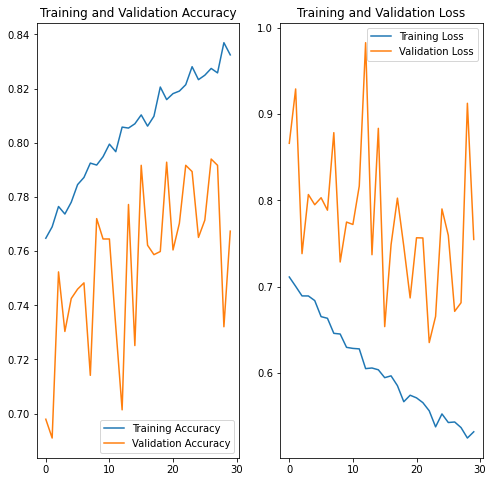

In [43]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [44]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 26ms/step


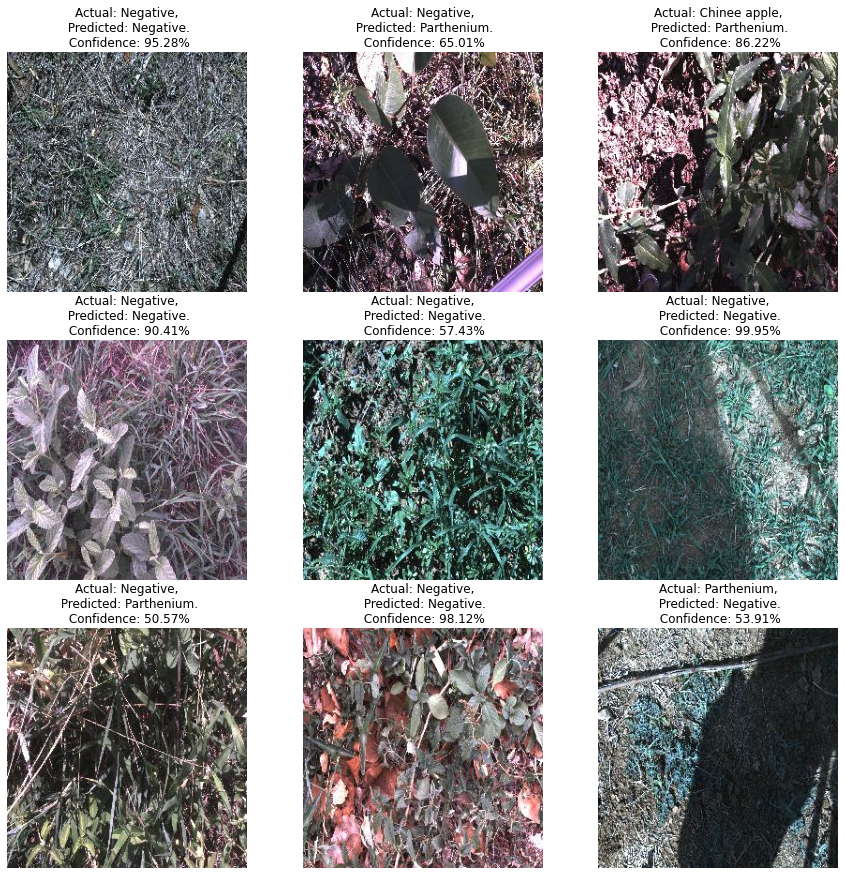

In [69]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [46]:
model.save('my_model.h5')